In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
"""
datafile = 'VF-G3922-02.csv' # Archivo a Interpolar
datafile = 'VF-G3968-02.csv' # Archivo a Interpolar
datafile = 'VF-G3875-03.csv' # Archivo a Interpolar
datafile = 'VF-G3921-03.csv' # Archivo a Interpolar
datafile = 'VF-G3965-01.csv' # Archivo a Interpolar
datafile = 'VF-G3965-02.csv' # Archivo a Interpolar
datafile = 'VF-G4016-01.csv' # Archivo a Interpolar
datafile = 'VF-G3469-02.csv' # Archivo a Interpolar
datafile = 'VF-G3909-01.csv' # Archivo a Interpolar
datafile = 'VF-G3485-01.csv' # Archivo a Interpolar
"""

"\ndatafile = 'VF-G3922-02.csv' # Archivo a Interpolar\ndatafile = 'VF-G3968-02.csv' # Archivo a Interpolar\ndatafile = 'VF-G3875-03.csv' # Archivo a Interpolar\ndatafile = 'VF-G3921-03.csv' # Archivo a Interpolar\ndatafile = 'VF-G3965-01.csv' # Archivo a Interpolar\ndatafile = 'VF-G3965-02.csv' # Archivo a Interpolar\ndatafile = 'VF-G4016-01.csv' # Archivo a Interpolar\ndatafile = 'VF-G3469-02.csv' # Archivo a Interpolar\ndatafile = 'VF-G3909-01.csv' # Archivo a Interpolar\ndatafile = 'VF-G3485-01.csv' # Archivo a Interpolar\n"

In [3]:
datafile = 'VF-G3485-01.csv' # Archivo a Interpolar
df = pd.read_csv('./VF/' + datafile)                 # Directorio
df.shape

(102, 2)

In [4]:
df.columns = ['timestamps','values']
timestamps = pd.to_datetime(df['timestamps'].values)
values = df['values'].values

In [5]:
ts = pd.Series(values, index=timestamps)

In [6]:
ts = ts[~ts.index.duplicated()]
ts[ts==-1] = np.nan

In [7]:
newFreq=ts.resample('2S').asfreq()

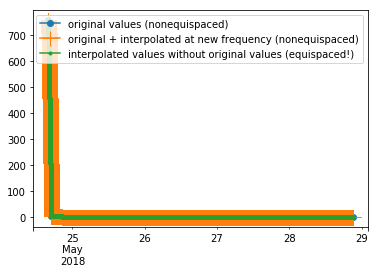

In [8]:
new = (ts.reindex(ts.index | newFreq.index)
           .interpolate(method='time')
           .loc[newFreq.index])

ts.plot(marker='o')
new.plot(marker='+',markersize=15)

new[newFreq.index].plot(marker='.')

lines, labels = plt.gca().get_legend_handles_labels()
labels = ['original values (nonequispaced)', 'original + interpolated at new frequency (nonequispaced)', 'interpolated values without original values (equispaced!)']
plt.legend(lines, labels, loc='best')
plt.show()

In [9]:
# Se guarda el nuevo archivo
interpol = 'interpolated_2s_' + datafile
new.to_csv('./VF/' + interpol)
new.shape

(181801,)

In [10]:
# Smoothing this shit with Dr. P-pillo code
import scipy.signal as signal

In [11]:
data_to_smooth = new[1:]
new = new[1:]
data_to_smooth.shape

(181800,)

In [12]:
data_cp = new.copy()

In [13]:
# apply low-pass filter
smooth_plots = []
# First, design the Buterworth filter
order  = 2   # Filter order
Wn = 0.05 # Cutoff frequency
B, A = signal.butter(order, Wn, output='ba')
smooth_plots = signal.filtfilt(B, A, data_to_smooth)
#smooth_plots = a_valores.apply(lambda row: signal.filtfilt(B, A, row))

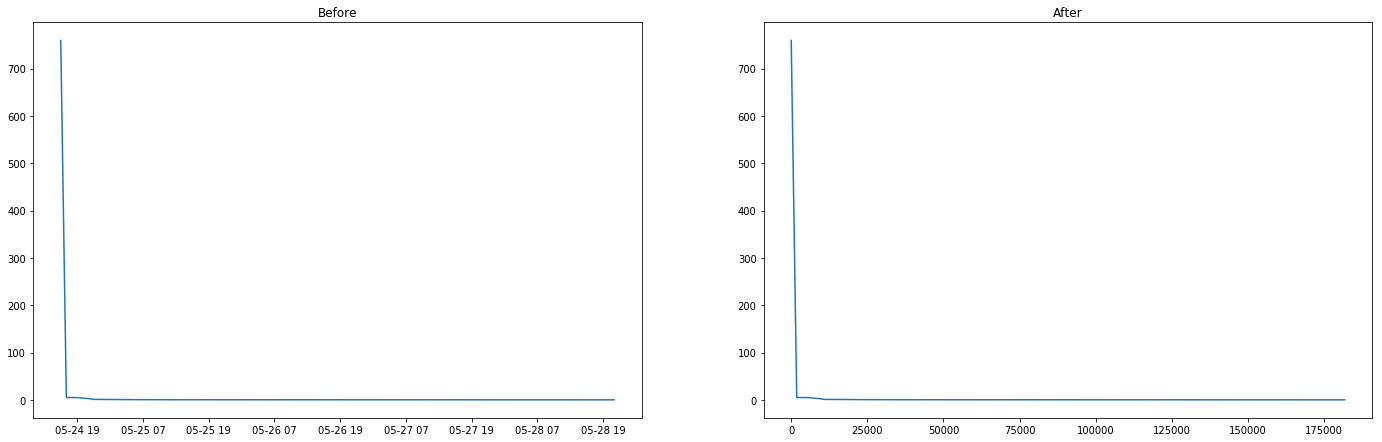

In [14]:
# plot current state vs result
fig = plt.figure(figsize=(24, 16))

ax1 = fig.add_subplot(221)
ax1.set_title("Before")
ax1.plot(data_to_smooth)

ax2 = fig.add_subplot(222)
ax2.set_title("After")
ax2.plot(smooth_plots)

plt.show()

In [15]:
data_cp[0:] = smooth_plots
if (data_cp == new).all(): #son iguales! D:
    raise "No se hizo bien el smooth"

In [16]:
# Se guarda el nuevo archivo
smooth = 'smoothed_2s_' + datafile
data_cp.to_csv('./VF/' + smooth)

In [17]:
df = pd.read_csv('./VF/' + smooth)     # Directorio
df.columns = ['timestamps','values']
timestamps = pd.to_datetime(df['timestamps'].values)
values = df['values'].values
ts = pd.Series(values, index=timestamps)
ts = ts[~ts.index.duplicated()]
ts[ts==-1] = np.nan

In [18]:
newFreq=ts.resample('300S').asfreq()

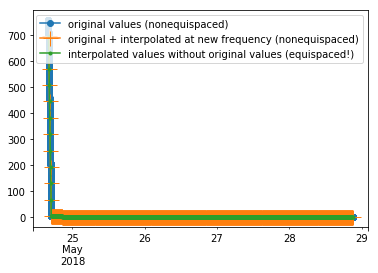

In [19]:
new = (ts.reindex(ts.index | newFreq.index)
           .interpolate(method='time')
           .loc[newFreq.index])

ts.plot(marker='o')
new.plot(marker='+',markersize=15)

new[newFreq.index].plot(marker='.')

lines, labels = plt.gca().get_legend_handles_labels()
labels = ['original values (nonequispaced)', 'original + interpolated at new frequency (nonequispaced)', 'interpolated values without original values (equispaced!)']
plt.legend(lines, labels, loc='best')
plt.show()

In [20]:
# Se guarda el nuevo archivo
last = 'interpolated_5min_' + datafile
new.to_csv('./VF/' + last)

In [21]:
new[0] = new[1]

In [22]:
new

2018-05-24 16:00:00    697.083333
2018-05-24 16:05:00    697.083333
2018-05-24 16:10:00    634.166667
2018-05-24 16:15:00    571.250000
2018-05-24 16:20:00    508.333333
2018-05-24 16:25:00    445.416667
2018-05-24 16:30:00    382.500000
2018-05-24 16:35:00    319.583333
2018-05-24 16:40:00    256.666667
2018-05-24 16:45:00    193.750000
2018-05-24 16:50:00    130.833333
2018-05-24 16:55:00     67.916667
2018-05-24 17:00:00      5.942140
2018-05-24 17:05:00      5.000000
2018-05-24 17:10:00      5.000000
2018-05-24 17:15:00      5.000000
2018-05-24 17:20:00      5.000000
2018-05-24 17:25:00      5.000000
2018-05-24 17:30:00      5.000000
2018-05-24 17:35:00      5.000000
2018-05-24 17:40:00      5.000000
2018-05-24 17:45:00      5.000000
2018-05-24 17:50:00      5.000000
2018-05-24 17:55:00      5.000000
2018-05-24 18:00:00      5.000000
2018-05-24 18:05:00      5.000000
2018-05-24 18:10:00      5.000000
2018-05-24 18:15:00      5.000000
2018-05-24 18:20:00      5.000000
2018-05-24 18: